I will test out the 2D lattice Hopfield network implementation, and investigate its memory capacity.

## Imports...

In [1]:
# enables plotting inline of Jupyter notebooks
%matplotlib inline

# autoreloading of modules
%load_ext autoreload
%autoreload 2

import numpy as np
import math

from network import HopfieldNetwork
from pattern_tools import PatternFactory
import pattern_tools
import plot_tools

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

## Creating Lattice Hopfield Network with N = 100 Neurons

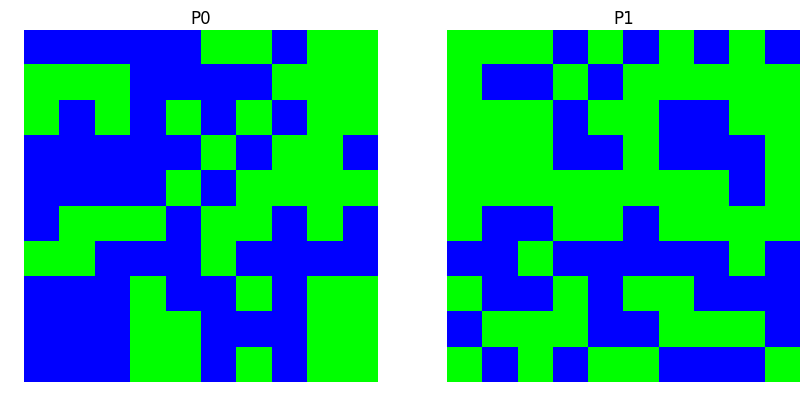

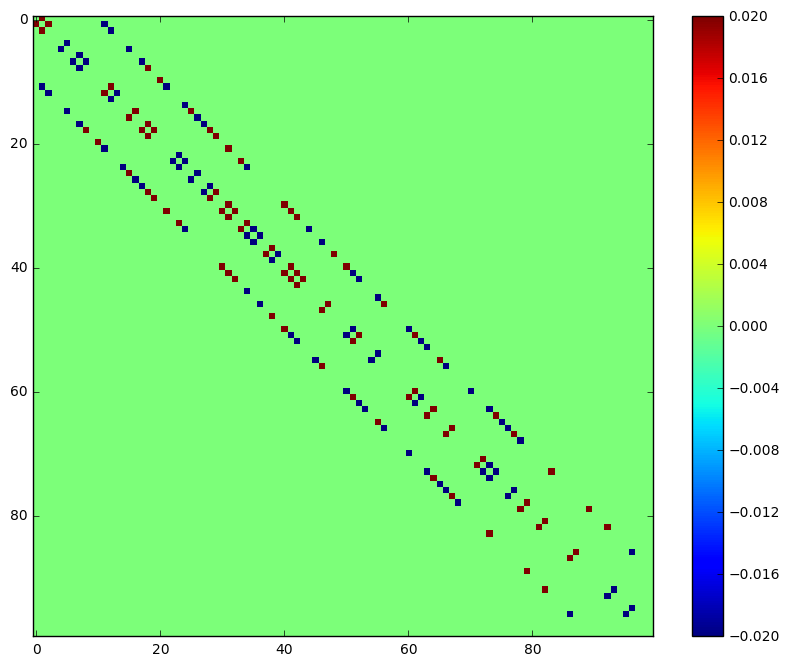

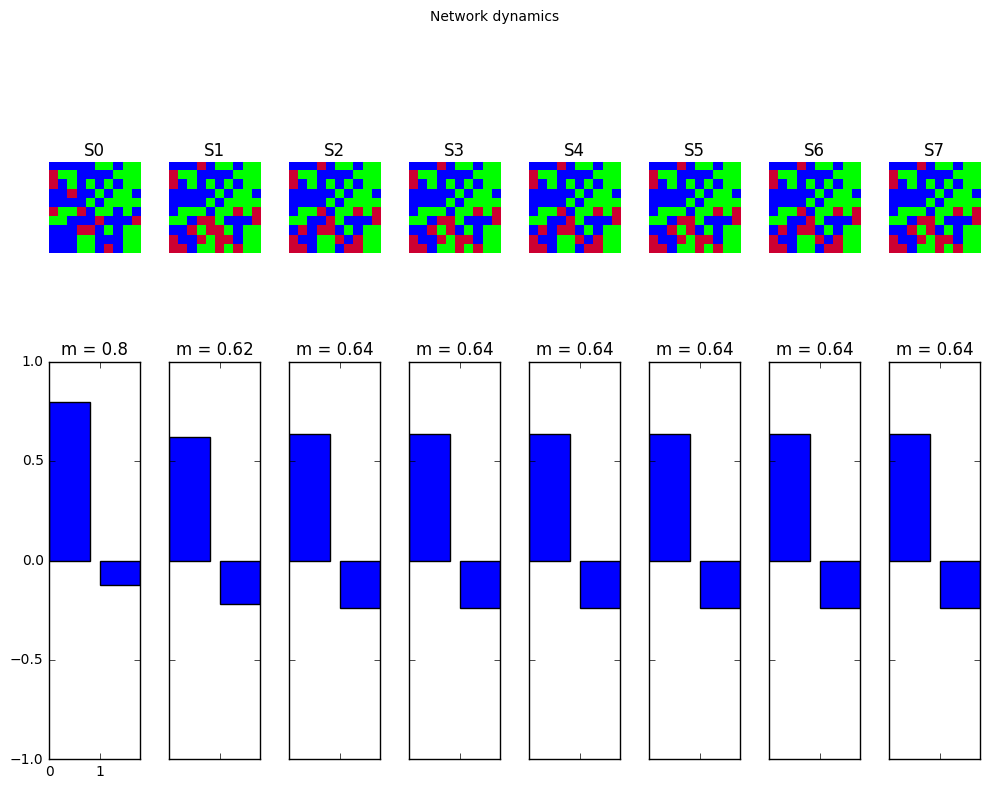

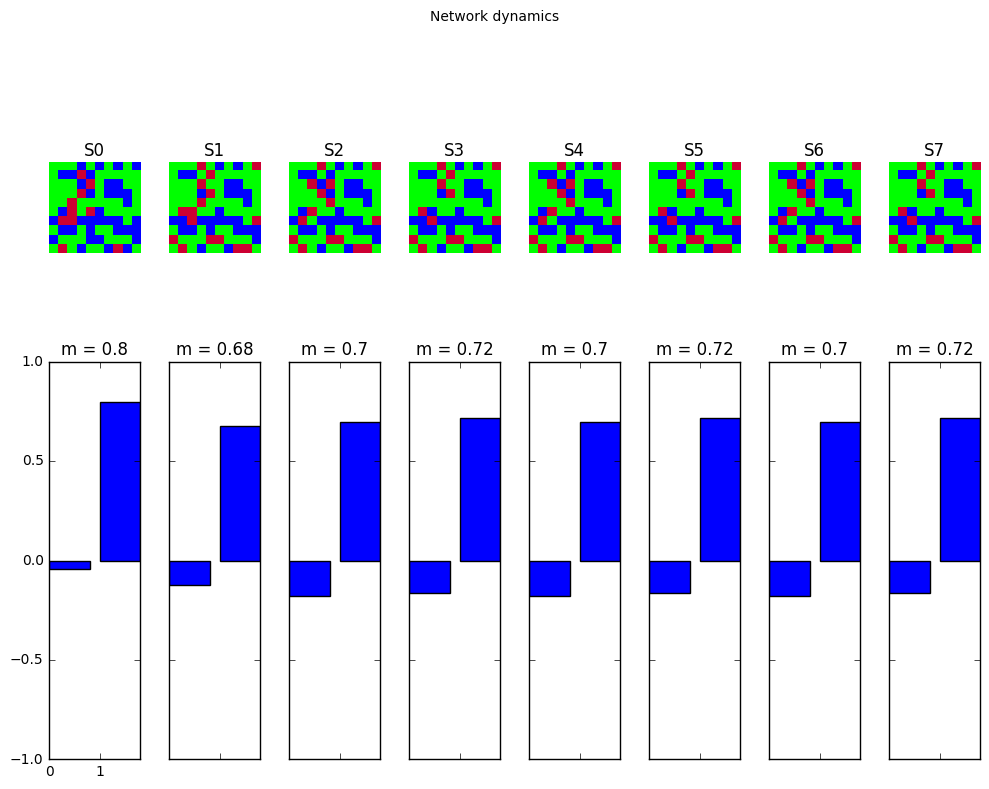

In [3]:
# architecture parameters
nr_neurons = 100 # should be a square number for 2D patterns
pattern_length, pattern_width = int(math.sqrt(nr_neurons)), int(math.sqrt(nr_neurons))
on_probability = 0.50 # for random patterns, the probability that a single pixel is "on"
nr_patterns = 2 # number of patterns to store in the network
nr_of_flips = int(math.ceil(.10 * nr_neurons)) # number of flips to do noisy pattern network initialization
nr_steps = 7 # number of steps to unroll the network dynamics

# create Hopfield network with lattice connectivity
nn = HopfieldNetwork(nr_neurons=nr_neurons, connectivity='lattice')

# create a pattern factory for this network
factory = PatternFactory(pattern_length=pattern_length, pattern_width=pattern_width)
# create 5 random patterns to store in the network (it shouldn't be able to recall whatsoever).
patterns = factory.create_random_pattern_list(nr_patterns=nr_patterns, on_probability=on_probability)
# plot the patterns
plot_tools.plot_pattern_list(patterns)

# store the patterns in the lattice Hopfield network
nn.store_patterns(patterns)
# take a look at network weights
plot_tools.plot_network_weights(hopfield_network=nn)

# try to recall from all 5 patterns
for idx, pattern in enumerate(patterns):
    # get a noisy copy of the pattern
    noisy_init = pattern_tools.flip_n(pattern, nr_of_flips=nr_of_flips)
    # set the initial state of the Hopfield network as the noisy copy
    nn.set_state_from_pattern(noisy_init)
    
    # let the dynamics evolve from this initial state
    states = nn.run_with_monitoring(nr_steps=nr_steps)
    
    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    # plot the states of the network
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, patterns, reference_idx=idx, suptitle="Network dynamics")

## Creating Lattice Hopfield Network with N = 900 Neurons

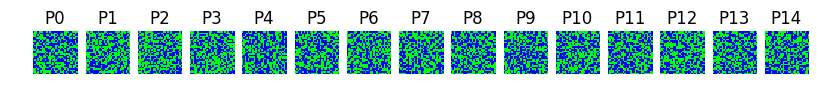

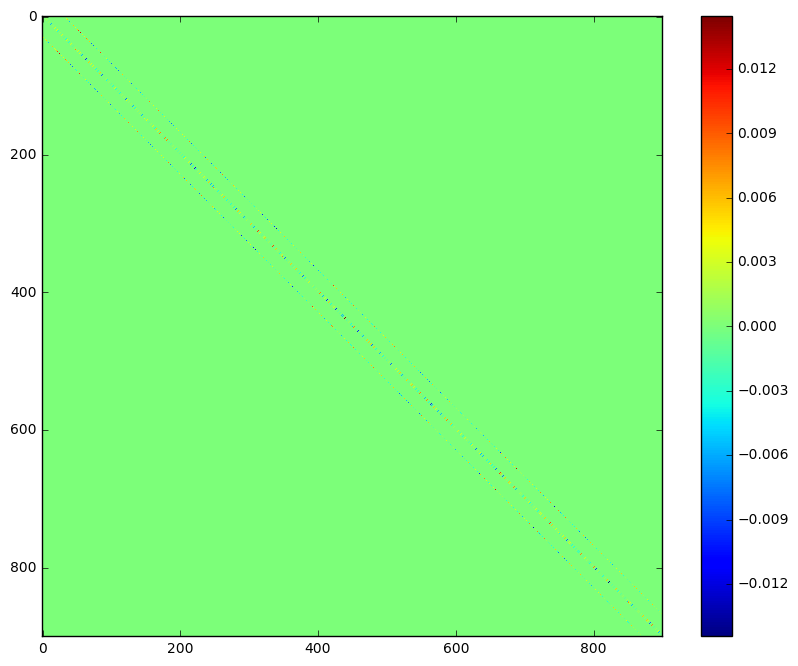

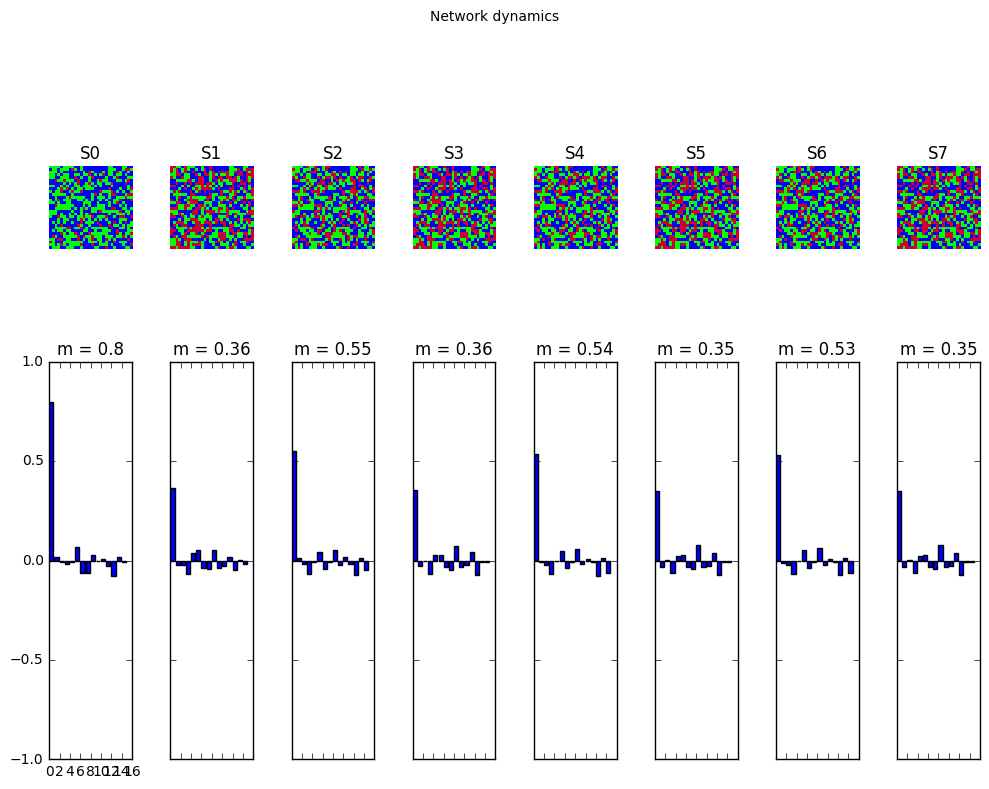

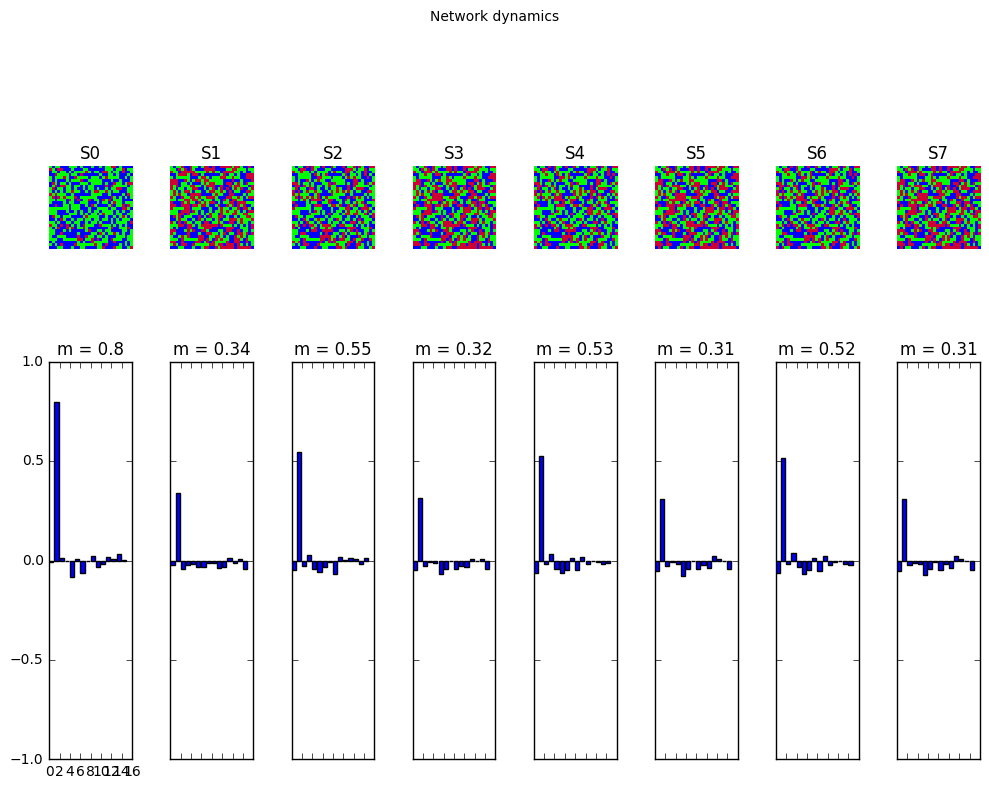

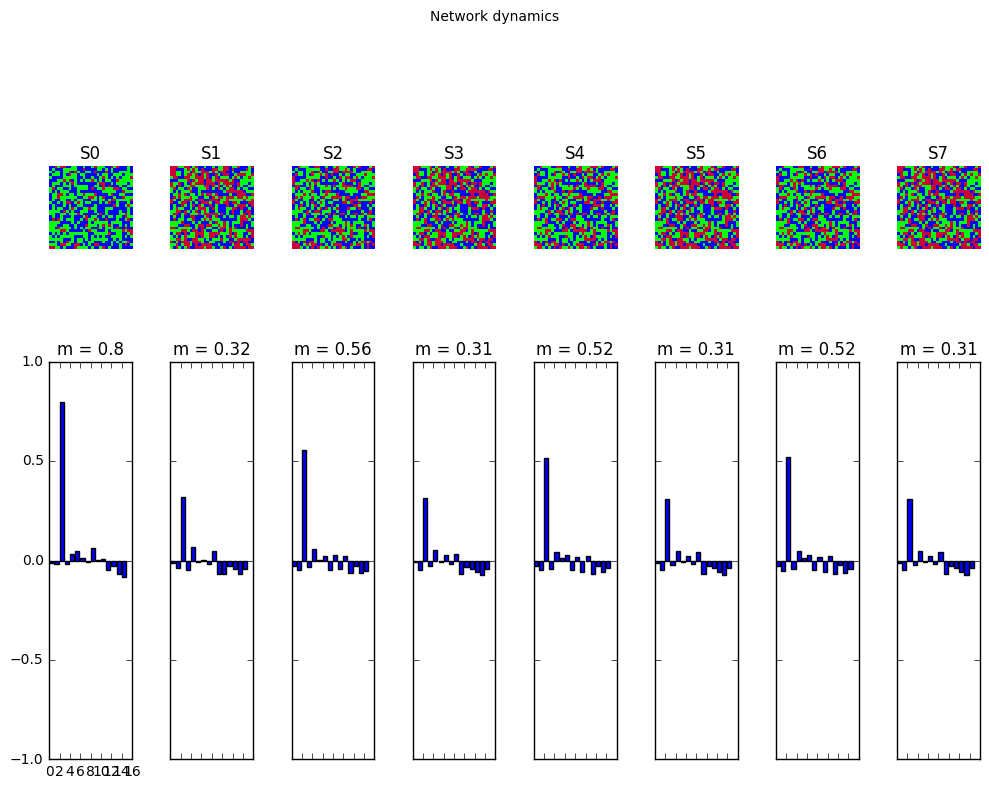

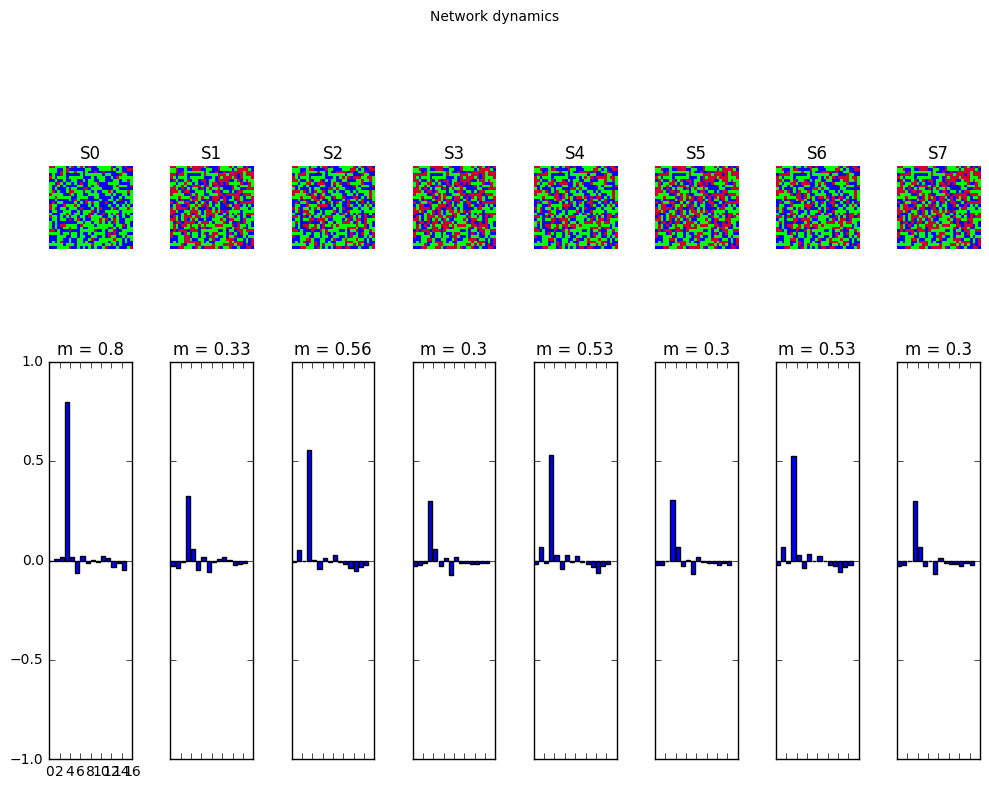

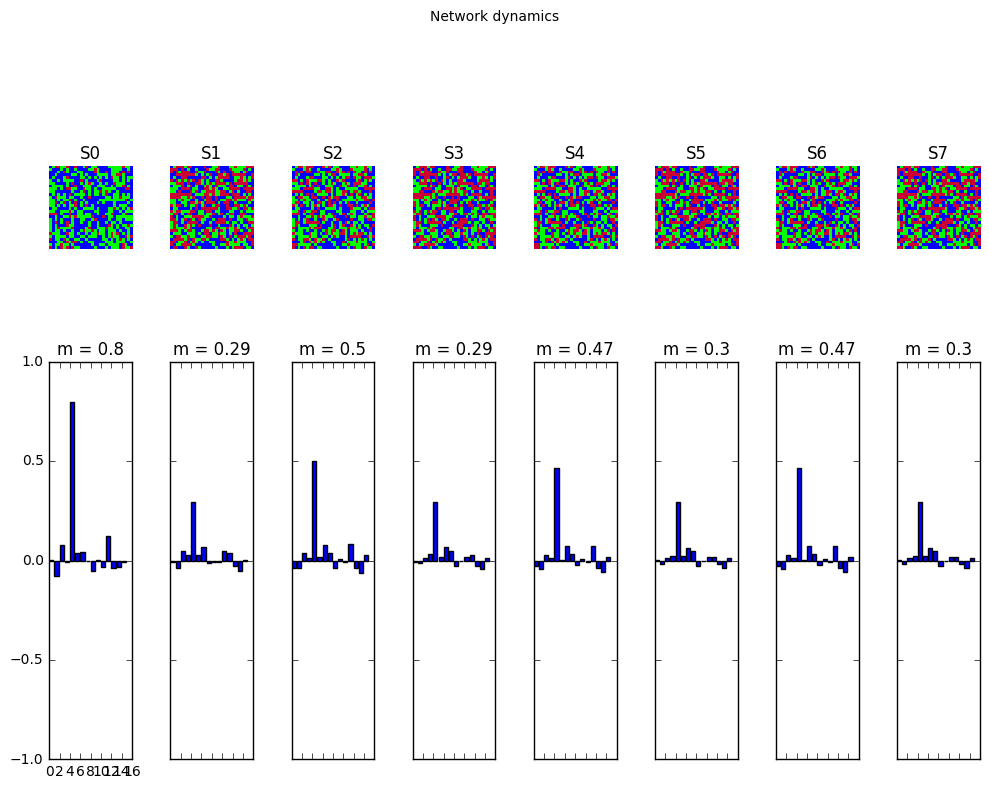

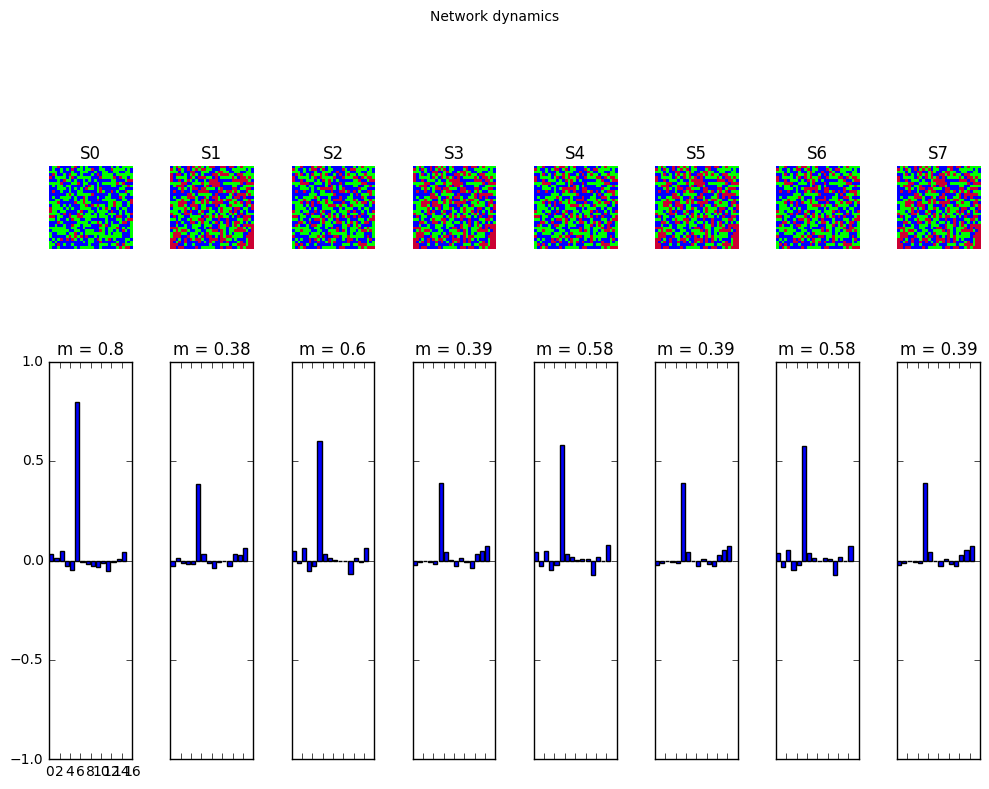

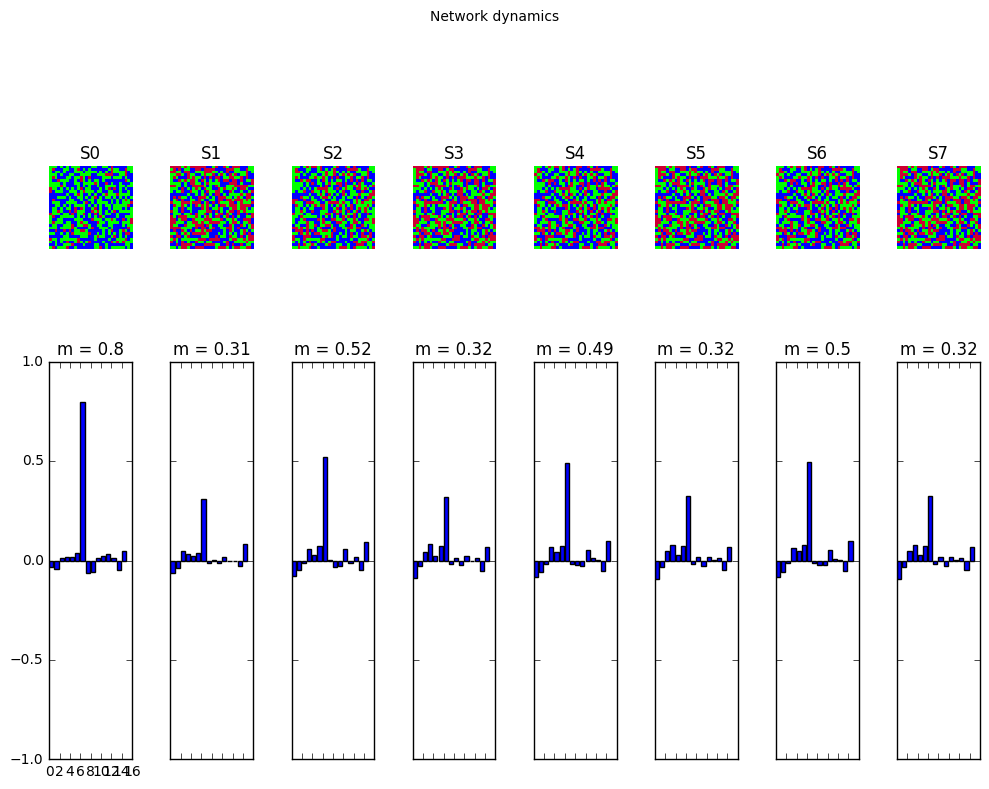

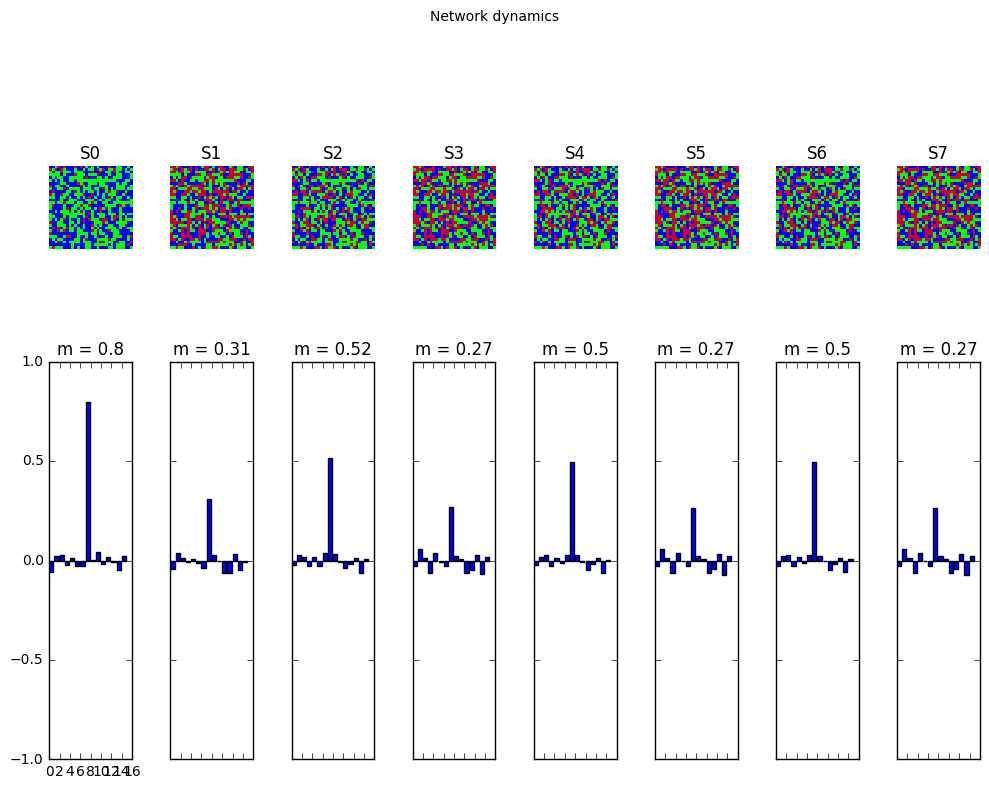

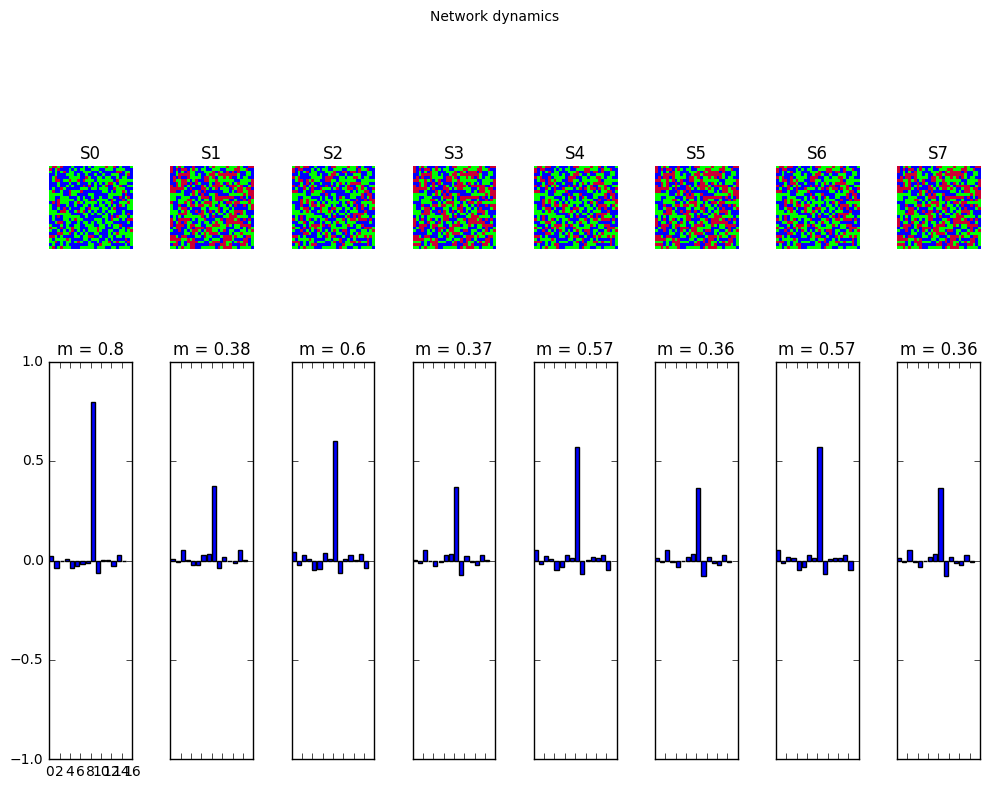

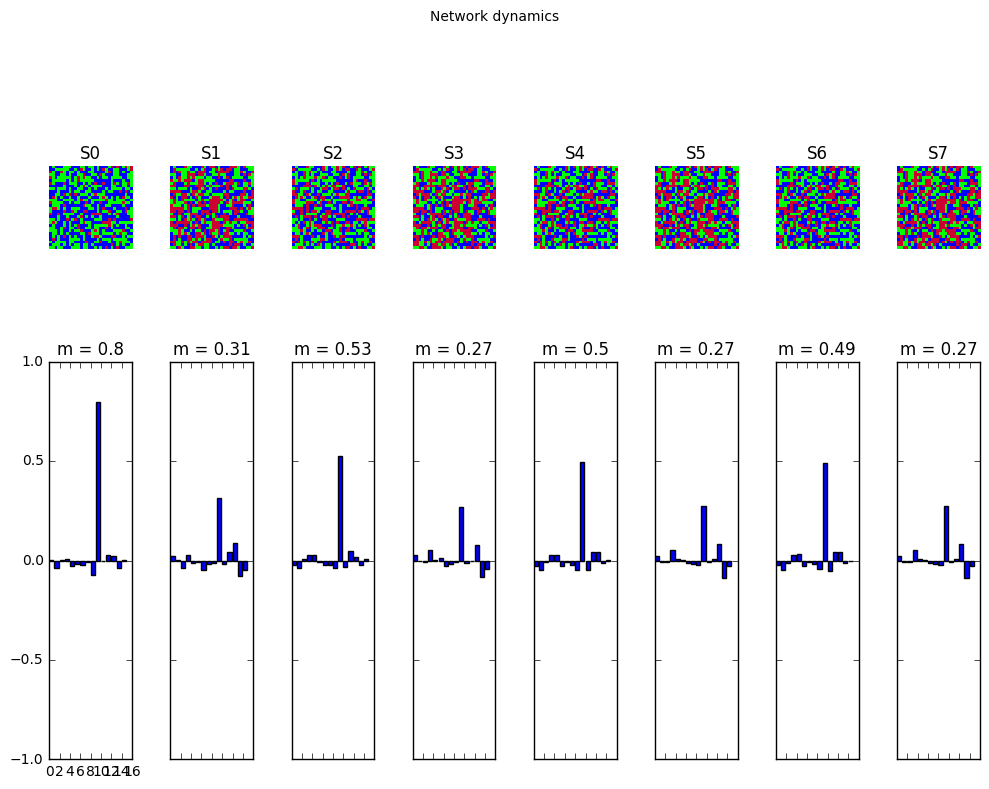

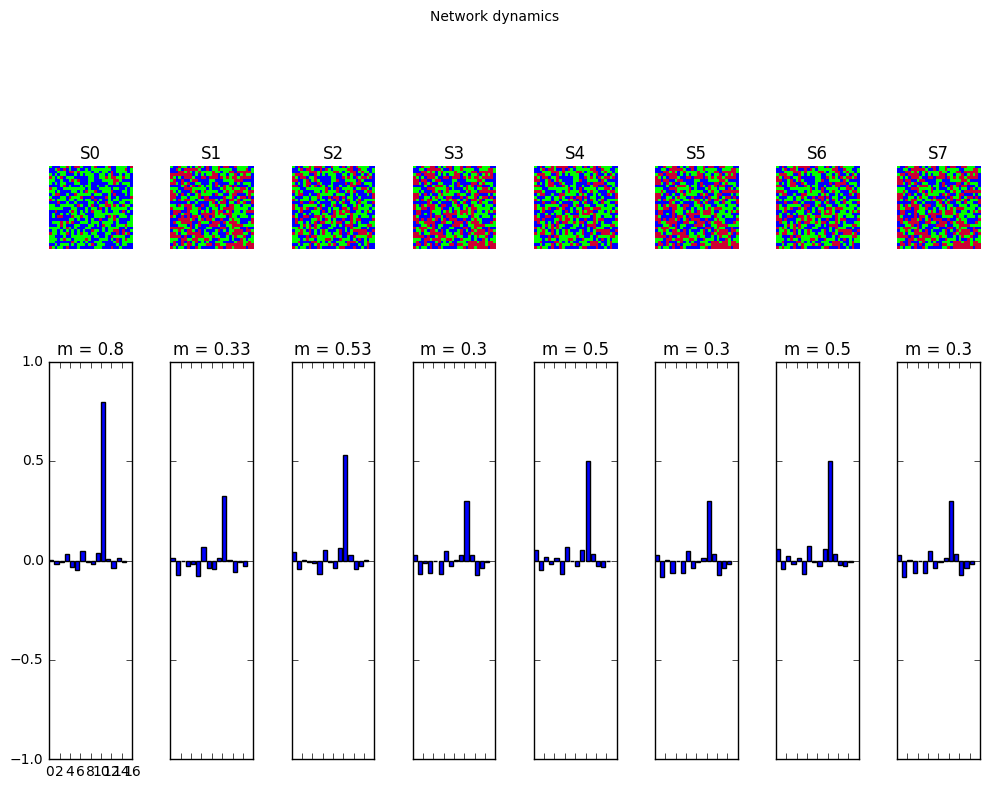

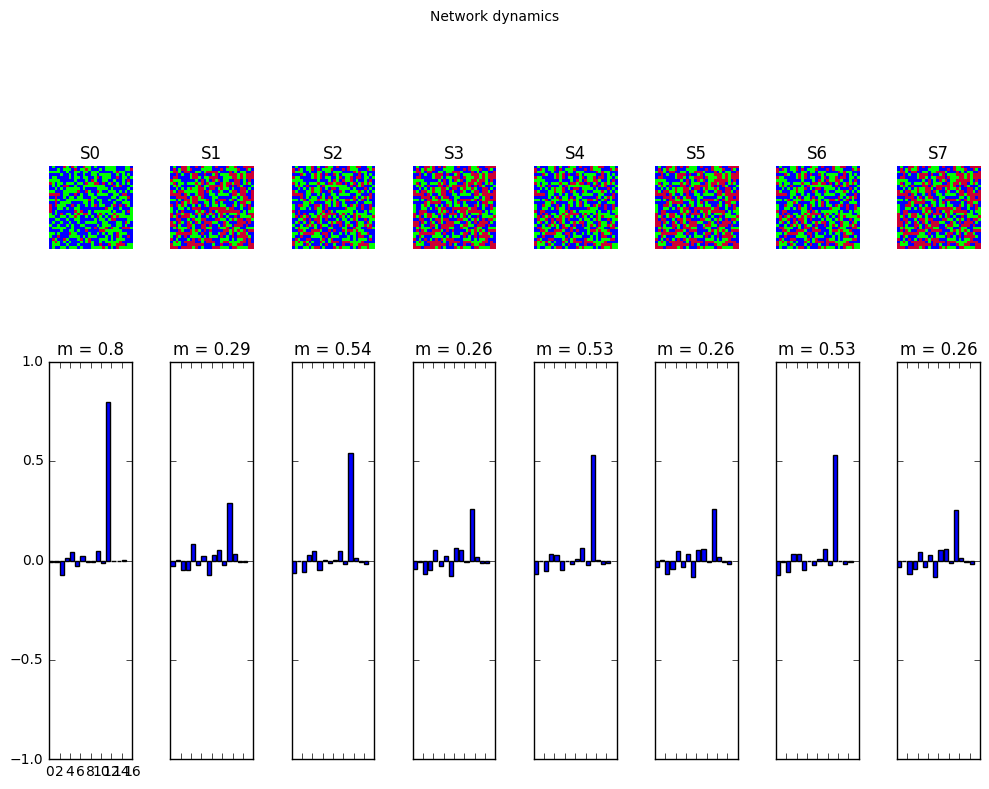

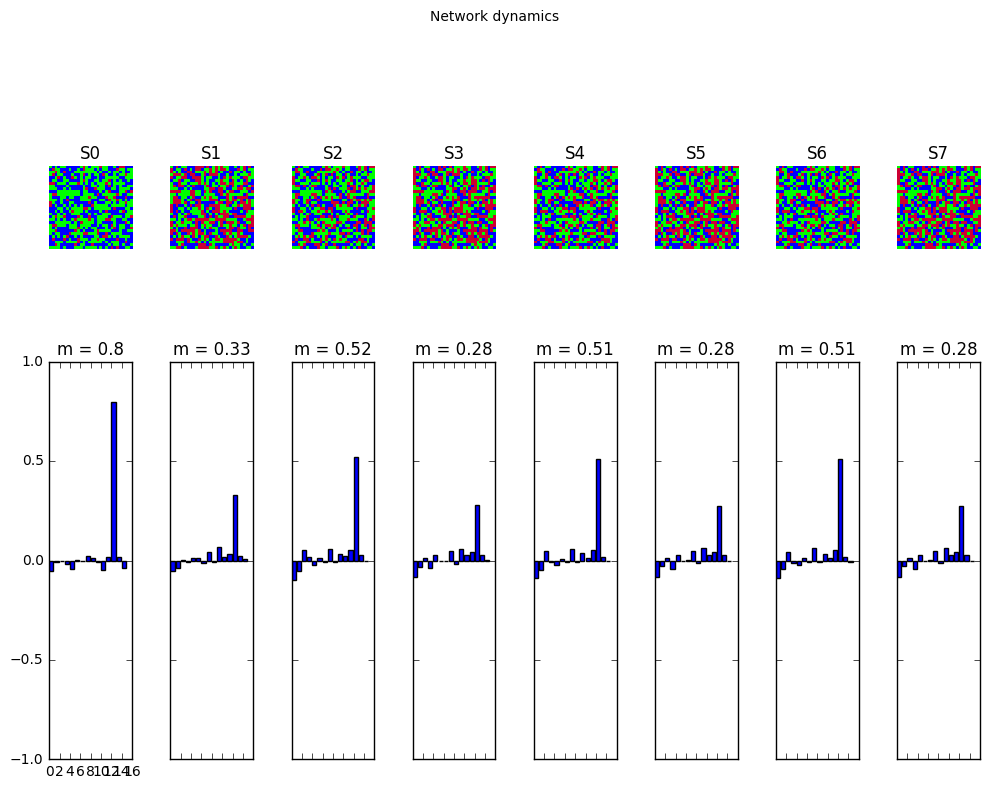

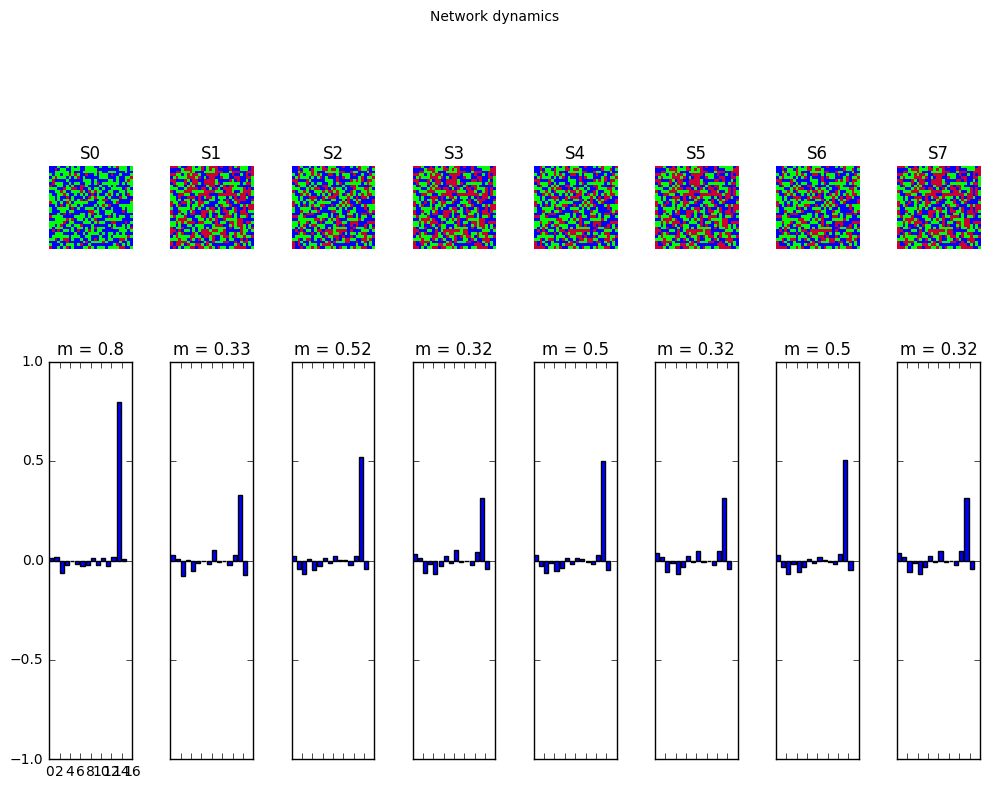

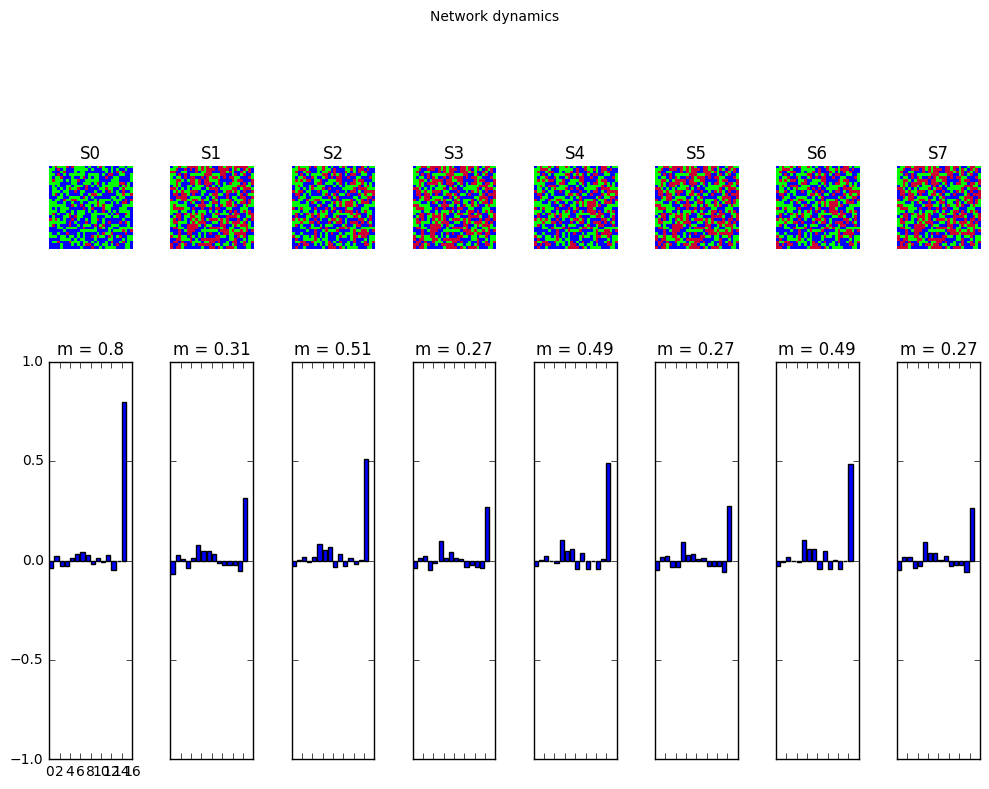

In [5]:
# architecture parameters
nr_neurons = 900 # should be a square number for 2D patterns
pattern_length, pattern_width = int(math.sqrt(nr_neurons)), int(math.sqrt(nr_neurons))
on_probability = 0.50 # for random patterns, the probability that a single pixel is "on"
nr_patterns = 15 # number of patterns to store in the network
nr_of_flips = int(math.ceil(.10 * nr_neurons)) # number of flips to do noisy pattern network initialization
nr_steps = 7 # number of steps to unroll the network dynamics

# create Hopfield network with lattice connectivity
nn = HopfieldNetwork(nr_neurons=nr_neurons, connectivity='lattice')

# create a pattern factory for this network
factory = PatternFactory(pattern_length=pattern_length, pattern_width=pattern_width)
# create 5 random patterns to store in the network (it shouldn't be able to recall whatsoever).
patterns = factory.create_random_pattern_list(nr_patterns=nr_patterns, on_probability=on_probability)
# plot the patterns
plot_tools.plot_pattern_list(patterns)

# store the patterns in the lattice Hopfield network
nn.store_patterns(patterns)
# take a look at network weights
plot_tools.plot_network_weights(hopfield_network=nn)

# try to recall from all 5 patterns
for idx, pattern in enumerate(patterns):
    # get a noisy copy of the pattern
    noisy_init = pattern_tools.flip_n(pattern, nr_of_flips=nr_of_flips)
    # set the initial state of the Hopfield network as the noisy copy
    nn.set_state_from_pattern(noisy_init)
    
    # let the dynamics evolve from this initial state
    states = nn.run_with_monitoring(nr_steps=nr_steps)
    
    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    # plot the states of the network
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, patterns, reference_idx=idx, suptitle="Network dynamics")